In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# URL of the webpage with the table
url = "https://educationdata.org/college-enrollment-statistics"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')


# Find the first table (you can fine-tune the selection)
table = soup.find('table', {'class': 'table-responsive-mobile'})

# Extract the table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Extract the table rows (skipping the header)
rows = []
# Skip the header row
for row in table.find_all('tr')[1:]: 
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Create the DataFrame
enrollment_df = pd.DataFrame(rows, columns=headers)
enrollment_df

ModuleNotFoundError: No module named 'seaborn'

In [50]:
# URL of the webpage with the table
url = "https://educationdata.org/college-enrollment-statistics"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')


# Find the first table (you can fine-tune the selection)
tables = soup.find_all('table', {'class': 'table-responsive-mobile'})

enrollment_table = tables[3]

# Extract the table headers
headers = [th.text.strip() for th in enrollment_table.find_all('th')]

# Extract the table rows (skipping the header)
rows = []
# Skip the header row
for row in enrollment_table.find_all('tr')[1:]: 
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Create the DataFrame
post_sec_enroll = pd.DataFrame(rows, columns=headers)
post_sec_enroll

Year % Female Enrollment % Female Racial or Ethnic Minority Enrollment
0   2022              57.94%                                        27.19%
1   2021              58.37%                                        26.91%
2   2020              58.56%                                        26.80%
3   2019              57.39%                                        25.89%
4   2018              57.03%                                        25.21%
5   2017              56.66%                                        24.64%
6   2016              56.47%                                        24.11%
7   2015              56.36%                                        23.71%
8   2014              56.47%                                        23.45%
9   2010              56.96%                                        21.55%
10  2000              56.10%                                        16.53%
11  1990              54.28%                                        11.06%
12  1980              51.44%                                         8.80%
13  1976              47.23%                                         7.85%

In [51]:
# URL of the webpage with the table
url = "https://educationdata.org/college-enrollment-statistics"
response = requests.get(url)

# Parsing the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Finding all the tables
tables = soup.find_all('table', {'class': 'table-responsive-mobile'})

#finding 
ethnic_table = tables[2]

# Extract the table headers
headers = [th.text.strip() for th in ethnic_table.find_all('th')]

# Extract the table rows (skipping the header)
rows = []
# Skip the header row
for row in ethnic_table.find_all('tr')[1:]: 
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

# Create the DataFrame
demographic_df = pd.DataFrame(rows, columns=headers)
demographic_df






Year % Racial or Ethnic Minority Enrollment  \
0   2022                                 45.23%   
1   2021                                 44.35%   
2   2020                                 43.94%   
3   2019                                 43.41%   
4   2018                                 42.52%   
5   2017                                 41.77%   
6   2016                                 40.97%   
7   2015                                 40.36%   
8   2014                                 39.84%   
9   2010                                 36.11%   
10  2000                                 28.22%   
11  1990                                 19.57%   
12  1980                                 16.11%   
13  1976                                 15.35%   

   % Black or African American Enrollment  
0                                  12.50%  
1                                  12.48%  
2                                  12.54%  
3                                  12.57%  
4                                  12.70%  
5                                  12.89%  
6                                  13.05%  
7                                  13.41%  
8                                  13.82%  
9                                  14.46%  
10                                 11.30%  
11                                  9.02%  
12                                  9.15%  
13                                  9.38%

In [52]:
# combining the two data frames into a single dataframe
merged_df = pd.merge(post_sec_enroll, demographic_df)
merged_df

Year % Female Enrollment % Female Racial or Ethnic Minority Enrollment  \
0   2022              57.94%                                        27.19%   
1   2021              58.37%                                        26.91%   
2   2020              58.56%                                        26.80%   
3   2019              57.39%                                        25.89%   
4   2018              57.03%                                        25.21%   
5   2017              56.66%                                        24.64%   
6   2016              56.47%                                        24.11%   
7   2015              56.36%                                        23.71%   
8   2014              56.47%                                        23.45%   
9   2010              56.96%                                        21.55%   
10  2000              56.10%                                        16.53%   
11  1990              54.28%                                        11.06%   
12  1980              51.44%                                         8.80%   
13  1976              47.23%                                         7.85%   

   % Racial or Ethnic Minority Enrollment  \
0                                  45.23%   
1                                  44.35%   
2                                  43.94%   
3                                  43.41%   
4                                  42.52%   
5                                  41.77%   
6                                  40.97%   
7                                  40.36%   
8                                  39.84%   
9                                  36.11%   
10                                 28.22%   
11                                 19.57%   
12                                 16.11%   
13                                 15.35%   

   % Black or African American Enrollment  
0                                  12.50%  
1                                  12.48%  
2                                  12.54%  
3                                  12.57%  
4                                  12.70%  
5                                  12.89%  
6                                  13.05%  
7                                  13.41%  
8                                  13.82%  
9                                  14.46%  
10                                 11.30%  
11                                  9.02%  
12                                  9.15%  
13                                  9.38%

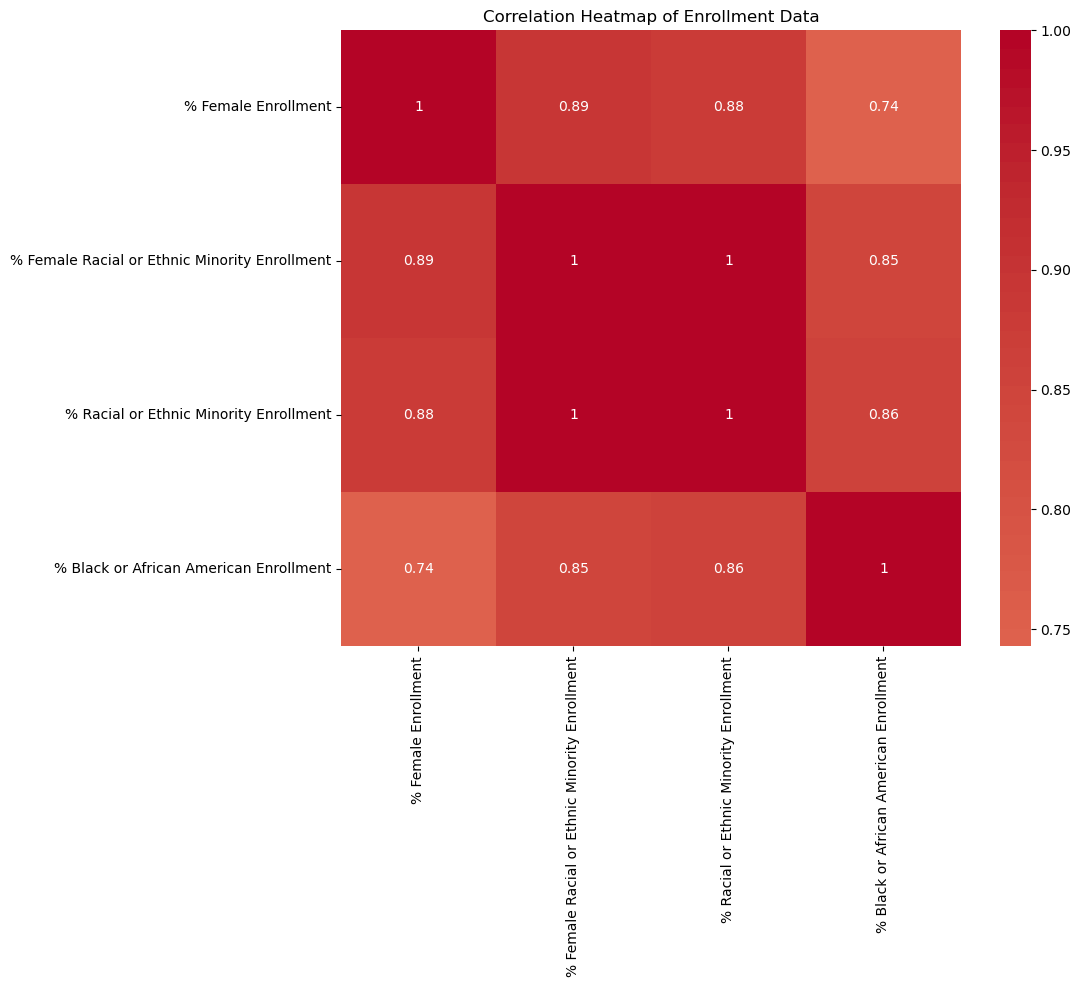

In [65]:
# Remove '%' symbols and convert to float for all relevant columns
for col in merged_df.columns[1:]:
    merged_df[col] = merged_df[col].str.replace('%', '').astype(float)

# Compute the correlation matrix
corr_matrix = merged_df.drop(columns=['Year']).corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Enrollment Data')
plt.show()
